# Uma Breve Introdução aos *Heatmaps*

Autor: [Willy Hagi](https://taggo.one/willyhagi)
* Meteorologista e Mestre em Clima e Ambiente
* Fundador da Meteonorte

**Atenção**! Este é o Jupyter Notebook de acompanhamento ao post homônimo no Blog da Meteonorte. Para mais informações, [leia o post](https://www.meteonorte.com/post/breve-intro-heatmaps).

In [ ]:
# caso você esteja em uma sessão do Google Colab, será necessário instalar o Seaborn
#!pip install seaborn

In [ ]:
# importar todos os pacotes necessários
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# anomalias de Temperatura do Instituto Berkeley Earth
url = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt'
best = pd.read_csv(url, comment='%', sep='\s+', header=None)

In [ ]:
# cabeçalho do DataFrame
best.head()

,0,1,2,3,4,5,6,7,8,9,10,11
4153,2022,11,0.655,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4154,2022,12,0.776,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4155,2023,1,0.814,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4156,2023,2,0.917,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4157,2023,3,1.096,0.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# criação de um novo DataFrame a partir dos dados acima
best_temp = pd.DataFrame({'Date': pd.date_range('1850-01-01', '2023-03-01', freq='MS'),
                          'Temp': best.iloc[:2079, 2].values}).set_index('Date')

In [ ]:
# cálculo de anomalias médias anuais
best_temp_anual = best_temp['Temp'].groupby(pd.Grouper(freq='1Y')).mean()

<ipython-input-30-2d89b81e4136>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sns.heatmap(data=best_temp_anual[np.newaxis,:],


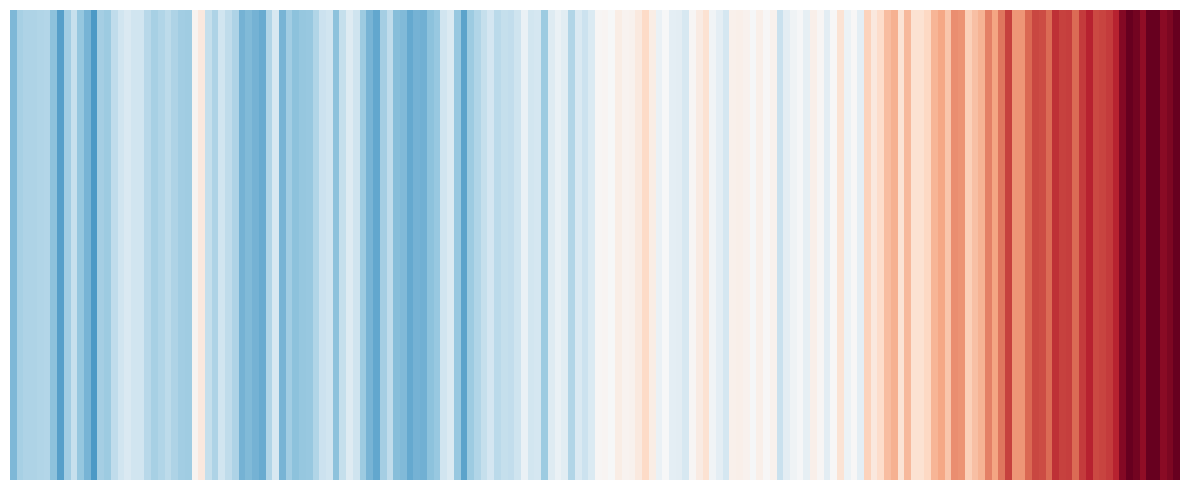

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

# plotar heatmap ao estilo das Warming Stripes
sns.heatmap(data=best_temp_anual[np.newaxis,:],
            cmap='RdBu_r', cbar=False,
            vmin=-1, vmax=1, center=0.,
           xticklabels=False, yticklabels=False)

plt.tight_layout()
# salvar figura
plt.savefig('warming_stripes.jpg', dpi=300)
plt.show()